### workflow examples for memo_py

Possible example workflows of the framework are outlined below. The workflows are categorised into the sections

- A Networks and Simulations
    - A1 define a network
    - A2 simulate a network by the Gillespie algorithm
    - A3 simulate a network by the moment-based algorithm
- B Data handling
    - B1 load mean, variance and covariance data
    - B2 create *in silico* count data and transform to mean, variance and covariance (including bootstrapping)
- C Parameter and Model Evidence Estimation
    - C1 fit a model to example data (the model to its own in silico data)
    - C2 fit a selection of models to the *in silico* data
    - C3 fit a selection of models to the example data

to explain the different functionalities of this framework.

In [3]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import corner
%matplotlib inline

#### A Networks and Simulations

#### A1 define a network

In [18]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

print(net.net_name)
print(net.net_modules)

### plot the network (main and hidden layer)
# main
x_axis = None
y_axis = None

node_settings = {
    'Y_t': {'label': 'CD44+', 'color': 'seagreen', 'fontsize': 8},
    'X_t': {'label': 'CD44-', 'color': 'midnightblue', 'fontsize': 8}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_01': {'label': '', 'fontsize': 8, 'color': None},
    'la_1': {'label': '', 'fontsize': 8, 'color': None}
}

output = {'output_folder': './example_figures',
        'plot_name': 'network_main_plot'}

im = me.Plots(x_axis, y_axis, show=False)
im.network_graph(*net.draw_main_network_graph(node_settings, edge_settings), output)

# hidden
x_axis = None
y_axis = None

node_settings = {
    'Y_t': {'label': 'CD44+', 'color': 'seagreen', 'fontsize': 8},
    'X_t': {'label': 'CD44-', 'color': 'midnightblue', 'fontsize': 8}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_01': {'label': 'd', 'fontsize': 8, 'color': None},
    'la_1': {'label': 'la', 'fontsize': 8, 'color': None}
}

output = {'output_folder': './example_figures',
        'plot_name': 'network_hidden_plot'}

im = me.Plots(x_axis, y_axis)
im.network_graph(*net.draw_hidden_network_graph(node_settings, edge_settings), output)

######
# NOTE: for all network plots, latex style labels cannot be used; 
# html style labels might be used instead (e.g., '<Y<SUP>t</SUP>>'; does not work for pdf)
######

net_1
[{'module': 'module_0', 'start-end': ('X_t', 'Y_t'), 'start-end_ident': ('Z_0', 'Z_1'), 'sym_rate': 'd_01', 'sym_rate_ident': 'theta_0', 'type': 'S -> E', 'module_steps': 1}, {'module': 'module_1', 'start-end': ('Y_t', 'Y_t'), 'start-end_ident': ('Z_1', 'Z_1'), 'sym_rate': 'la_1', 'sym_rate_ident': 'theta_1', 'type': 'S -> S + S', 'module_steps': 1}]


#### A2 simulate a network by the Gillespie algorithm

should not go here in estimation mode
should only go here once (prepare_simulation_variables)


/Users/mauricelanghinrichs/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


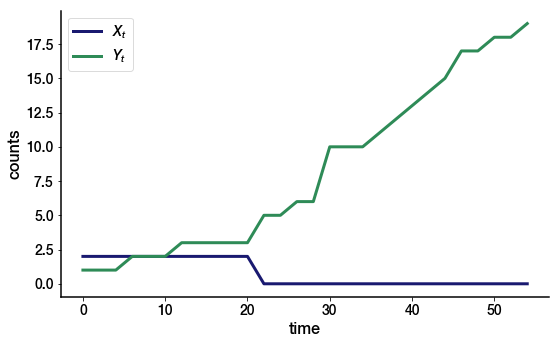

In [7]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]


initial_values = {'X_t': 2, 'Y_t': 1}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('gillespie', initial_values, theta_values, time_values, variables)

### plotting
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': '$Y_t$', 'color': 'seagreen'},
    'X_t': {'label': '$X_t$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_counts'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_counts(settings), output)

#### A3 simulate a network by the moment-based algorithm

should not go here in estimation mode
should only go here once (prepare_simulation_variables)
should go here just once (prepare_moment_simulation)
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
['-5.0*m[0]*theta[0]', '5.0*m[0]*theta[0] - 5.0*m[1]*theta[0]', '5.0*m[1]*theta[0] - 5.0*m[2]*theta[0]', '5.0*m[2]*theta[0] - 5.0*m[3]*theta[0]', '5.0*m[3]*theta[0] - 5.0*m[4]*theta[0]', '5.0*m[4]*theta[0] - 5.0*m[5]*theta[1] + 10.0*m[9]*theta[1]', '5.0*m[5]*theta[1] - 5.0*m[6]*theta[1]', '5.0*m[6]*theta[1] - 5.0*m[7]*theta[1]', '5.0*m[7]*theta[1] - 5.0*m[8]*theta[1]', '5.0*m[8]*theta[1] - 5.0*m[9]*theta[1]', '-10.0*m[10]*theta[0]', '5.0*m[10]*theta[0] - 10.0*m[11]*theta[0]', '5.0*m[11]*theta[0] - 10.0*m[12]*theta[0]', '5.0*m[12]*theta[0] - 10.0*m[13]*theta[0]', '5.0*m[13]*theta[0] - 10.0*m[14]*theta[0]', '5.0*m[14]*theta[0] - 5.0*m[15]*theta[0] - 5.0*m[15]*theta[1] + 10.0*m[19]*theta[1]', '5.0*m[15]*theta[1] - 

/Users/mauricelanghinrichs/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


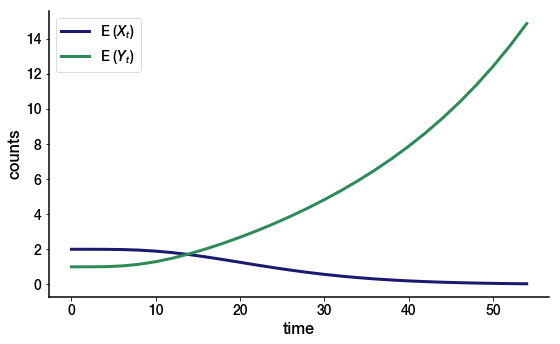

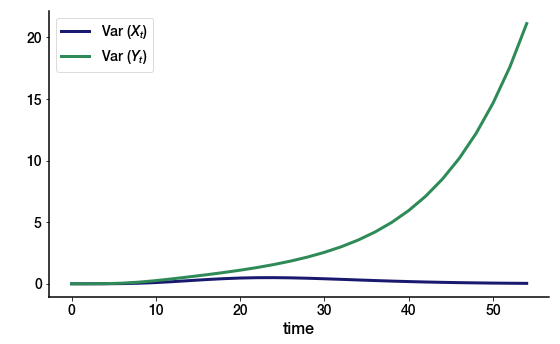

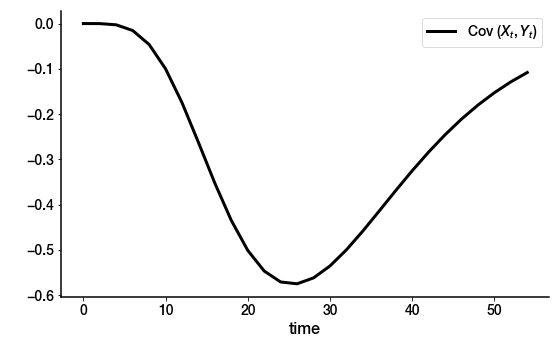

In [8]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 2.0, 'Y_t': 1.0}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)


#### A4 derive the symbolic moment equations for a defined network

#### B Data handling

#### B1 load mean, variance and covariance data

['Y_t', 'X_t']


/Users/mauricelanghinrichs/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


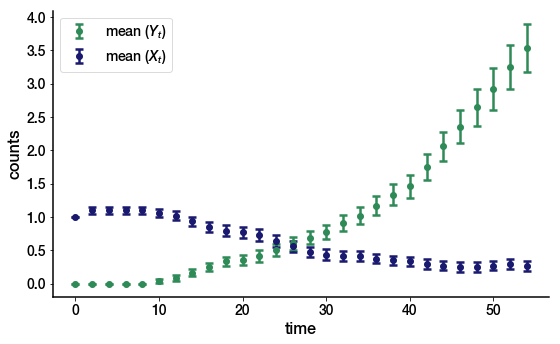

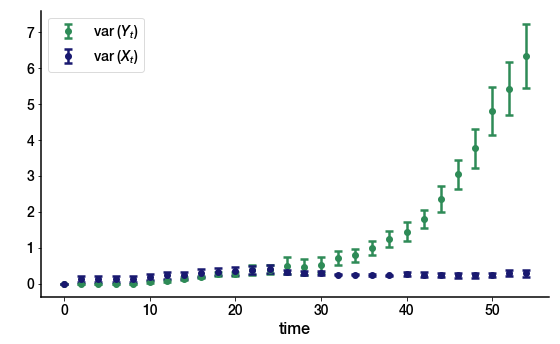

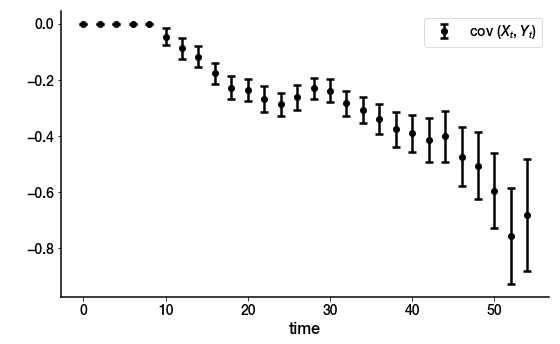

In [9]:
### load predefined data set with pickle
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14.pickle', 'rb'))
print(data)
print(data.data_variables)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)


#### B2 load count data and transform to mean, variance and covariance (including bootstrapping)

should not go here in estimation mode
should only go here once (prepare_simulation_variables)


/Users/mauricelanghinrichs/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


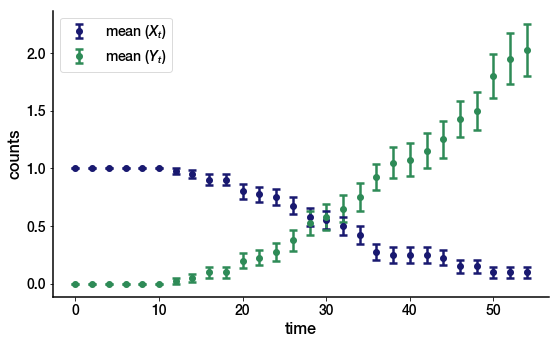

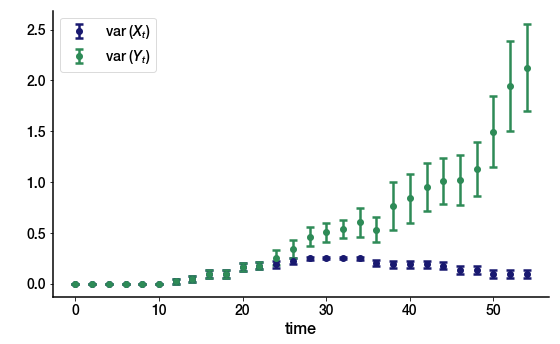

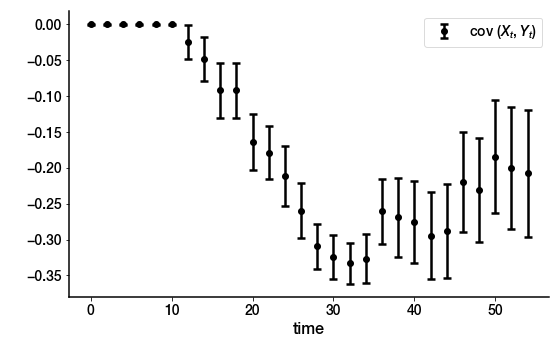

In [10]:
### run simulations to obtain in silico counts
num_iter = 40

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1, 'Y_t': 0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)

### creation of a new data object
data_name = 'data_in_silico'

data_input = {
    # general settings
    'variables': ['X_t', 'Y_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': time_values, # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': in_silico_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.001
}


data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)

should not go here in estimation mode
should only go here once (prepare_simulation_variables)
should go here just once (prepare_moment_simulation)
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
hello 1.1.1
['-5.0*m[0]*theta[0]', '5.0*m[0]*theta[0] - 5.0*m[1]*theta[0]', '5.0*m[1]*theta[0] - 5.0*m[2]*theta[0]', '5.0*m[2]*theta[0] - 5.0*m[3]*theta[0]', '5.0*m[3]*theta[0] - 5.0*m[4]*theta[0]', '5.0*m[4]*theta[0] - 5.0*m[5]*theta[1] + 10.0*m[9]*theta[1]', '5.0*m[5]*theta[1] - 5.0*m[6]*theta[1]', '5.0*m[6]*theta[1] - 5.0*m[7]*theta[1]', '5.0*m[7]*theta[1] - 5.0*m[8]*theta[1]', '5.0*m[8]*theta[1] - 5.0*m[9]*theta[1]', '-10.0*m[10]*theta[0]', '5.0*m[10]*theta[0] - 10.0*m[11]*theta[0]', '5.0*m[11]*theta[0] - 10.0*m[12]*theta[0]', '5.0*m[12]*theta[0] - 10.0*m[13]*theta[0]', '5.0*m[13]*theta[0] - 10.0*m[14]*theta[0]', '5.0*m[14]*theta[0] - 5.0*m[15]*theta[0] - 5.0*m[15]*theta[1] + 10.0*m[19]*theta[1]', '5.0*m[15]*theta[1] - 

/Users/mauricelanghinrichs/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


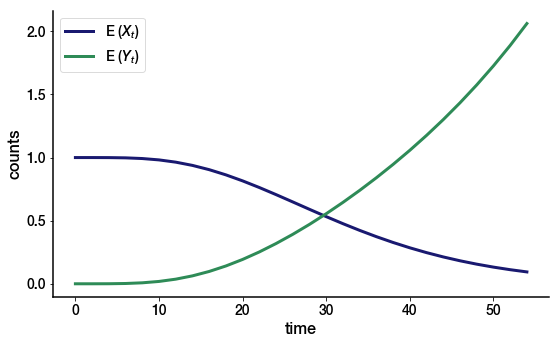

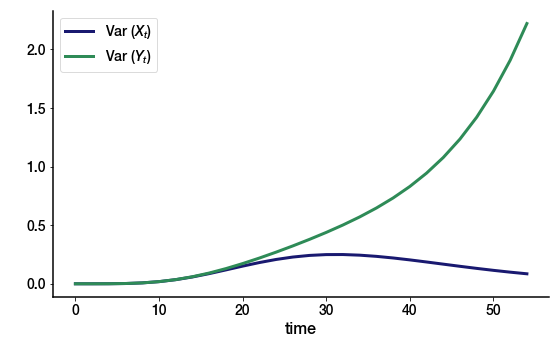

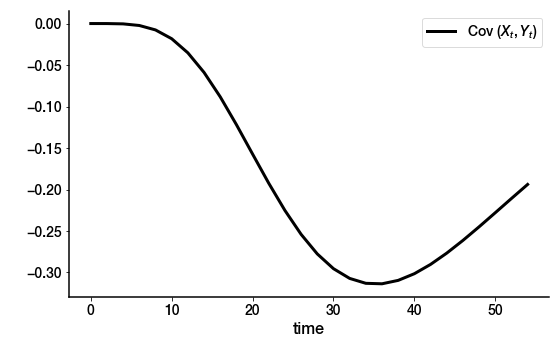

In [11]:
### compare to exact moments

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1.0, 'Y_t': 0.0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

# plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)

In [8]:
### store python object of the in silico data with pickle
with open('in_silico_data.pickle', 'wb') as file_:
    pickle.dump(data, file_)

#### B3 simulate moments of a network and load as *in silico* data

#### C Parameter and Model Evidence Estimation

#### C1 fit a model to example data (the model to its own *in silico* data)

In [2]:
### list of models (just one here)
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

setup_1 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}
    
#topology_2 = [
#        {'start': 'Y_t', 'end': 'X_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 3},
#        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 3}
#        ]
#setup_2 = {'initial_values': {'X_t': 0.0, 'Y_t': 1.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}}

list_models = [
    [('net_1'), (topology_1), (setup_1)]# ,
    # [('net_2'), (topology_2), (setup_2)]
]

### load the in silico data from section B
data = pickle.load(open('in_silico_data.pickle', 'rb'))
print(data)
print(data.data_name)

### input for selection
d = {
# model set
'model_set': list_models,

# data/model settings
'data': data,
'mean_only': False, # True or False

# mcmc settings
'burn_in_steps':                100, # 200, 500, 1000, 2000
'sampling_steps':               100, # 150, 500, 500
'num_temps':                    5, # 5
'num_walkers':                  64 # 64, 100, 200, 400
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)

data_in_silico
initialise estimation ...
should only go here once (prepare_simulation_variables)
should go here just once (prepare_moment_simulation)
[[('V_0',), ('V_1',)], [('V_0', 'V_0'), ('V_0', 'V_1'), ('V_1', 'V_1')]]
{'V_0': ('X_t', ('X_t',)), 'V_1': ('Y_t', ('Y_t',))}
['X_t', 'Y_t']
[('X_t', 'X_t'), ('Y_t', 'Y_t')]
[('X_t', 'Y_t')]
run estimation ...
   burn in ...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
   sampling ...
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
1

In [3]:
### save in silico estimation with pickle
with open('in_silico_estimation.pickle', 'wb') as file_:
    pickle.dump(res, file_)

In [4]:
### load in silico estimation with pickle
res = pickle.load(open('in_silico_estimation.pickle', 'rb'))
print(res)

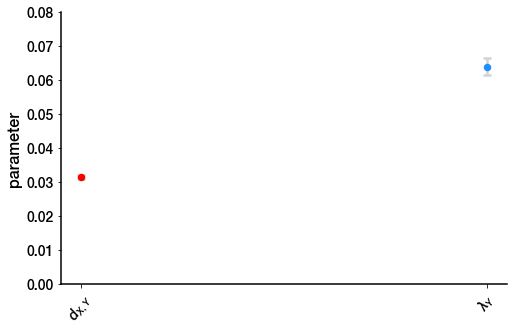

((0.03152896480187208, 0.03090667343632903, 0.03219785559324833), (0.06406257330165649, 0.06148306642481091, 0.06649032387975001))
(6400, 2)


In [5]:
est = res[0]

### plot one-dimensional parameter confidence bounds
x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_params_conf'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*est.dots_w_bars_parameters(settings), output)
print(est.bay_est_params_conf)
print(est.bay_est_samples_temp1.shape)

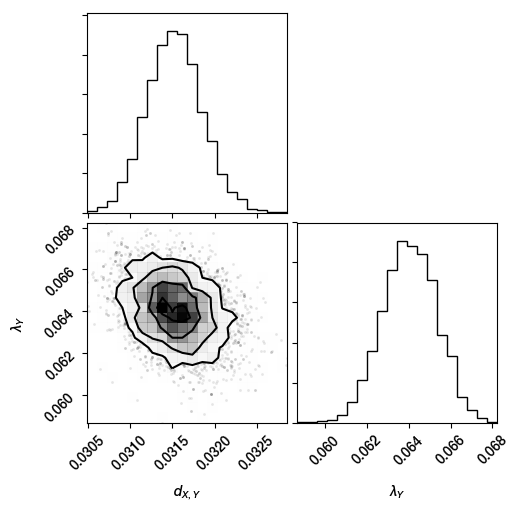

In [6]:
x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_corner'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_corner(*est.samples_corner_parameters(settings), output)


#corner.corner(res[0].bay_est_samples_temp1, labels=['theta_0 (d_01)', 'theta_1 (la_1)'])

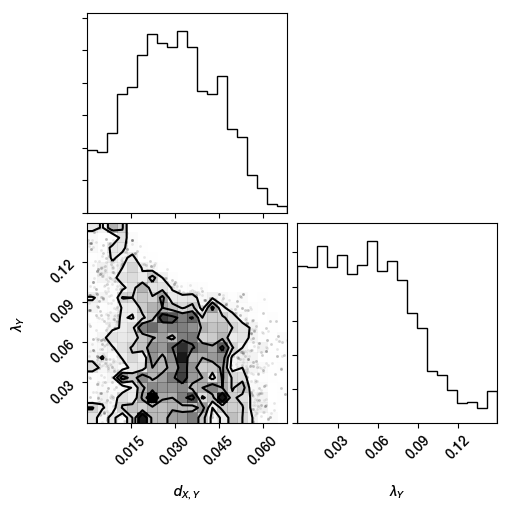

In [7]:
temperature_ind = 4

x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': f'fig_test_corner_temp{temperature_ind}'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_corner(*est.samples_corner_parameters(settings, temperature_ind=temperature_ind), output)

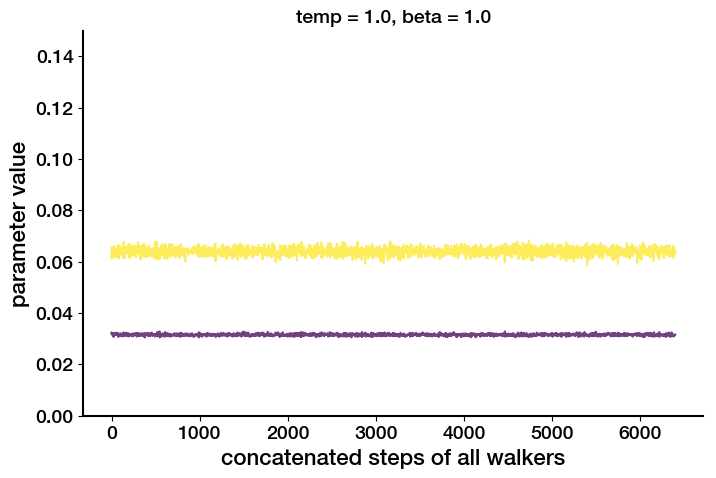

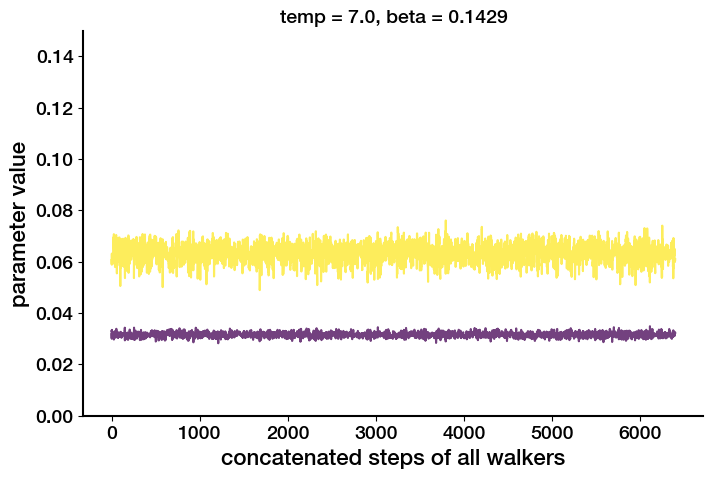

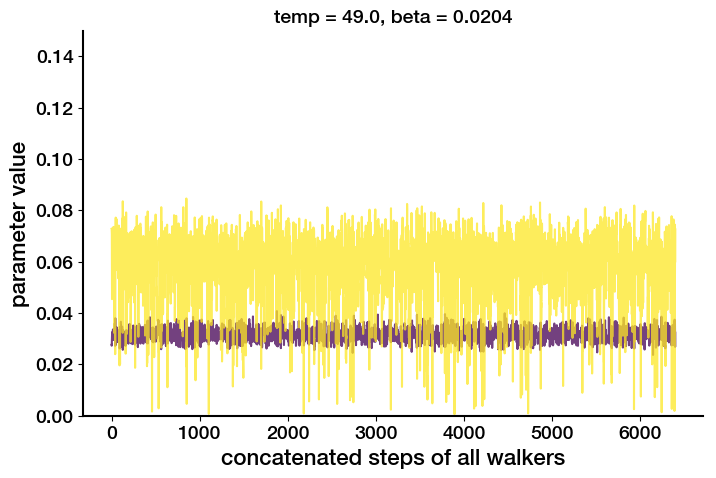

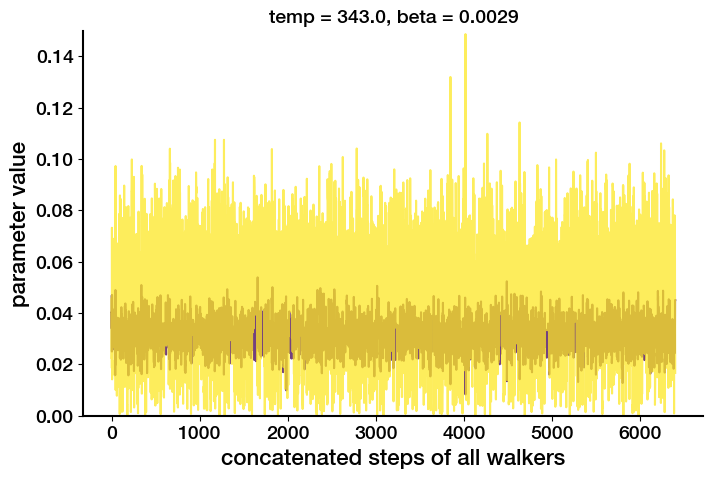

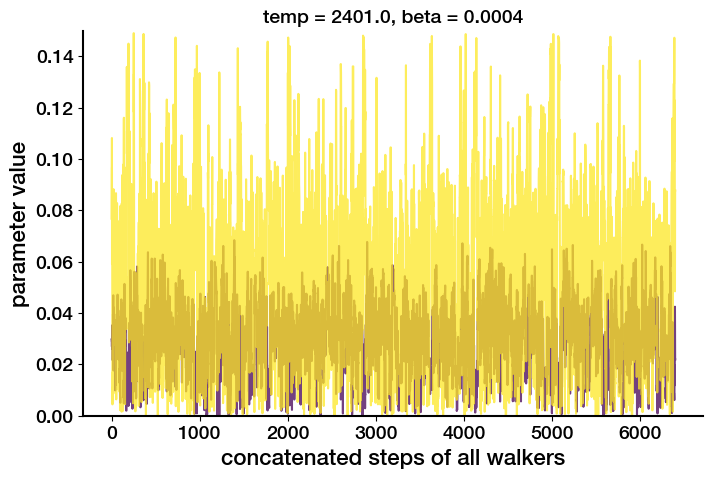

In [8]:
### chains
x_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (0.0, 0.15),
        'log': False}

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_chains'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_chains(*est.samples_chains_parameters(), output)

280.9893028332417 1.2918000732518067
net_1


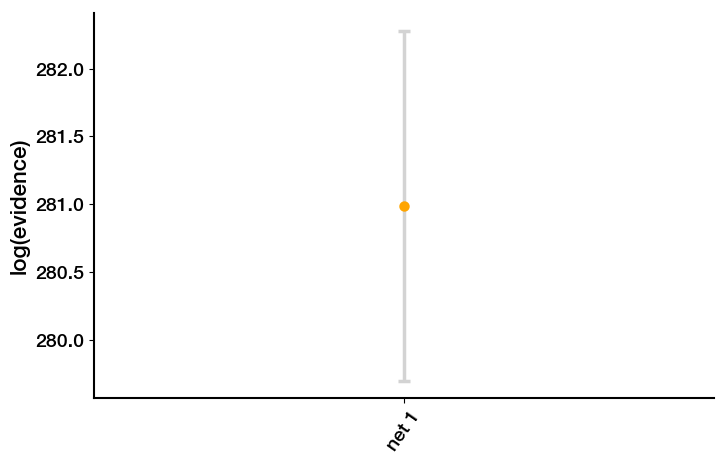

In [9]:
### log evidences of all models
model_selection = res
est = res[0]
print(est.bay_est_log_evidence, est.bay_est_log_evidence_error)
print(est.net.net_name)


x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'log(evidence)',
        'limits': (None, None),
        'log': False}

settings = {
    'net_1': {'label': 'net 1', 'color': 'orange'}
            }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_evidence'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*me.selection.dots_w_bars_evidence(model_selection, settings), output)


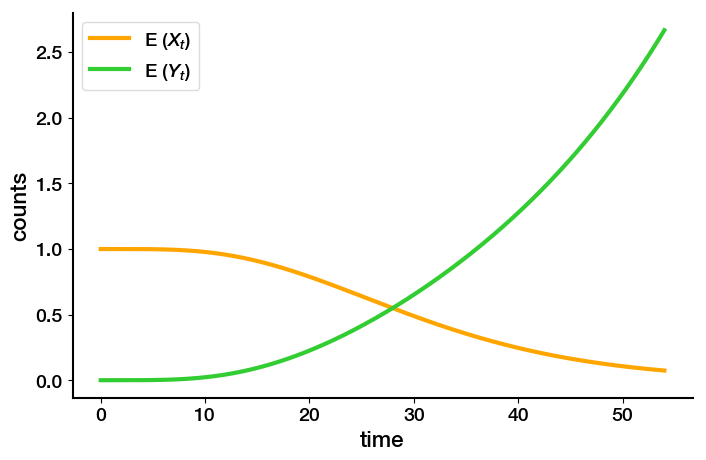

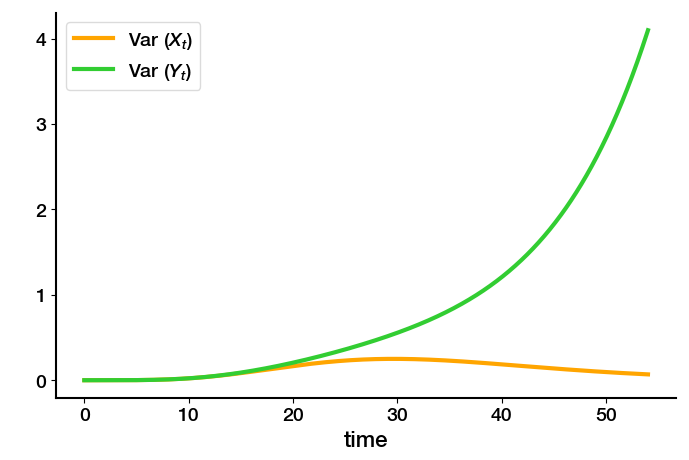

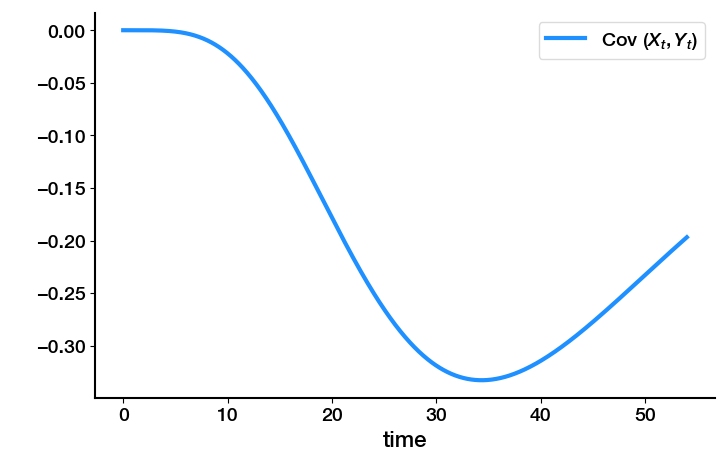

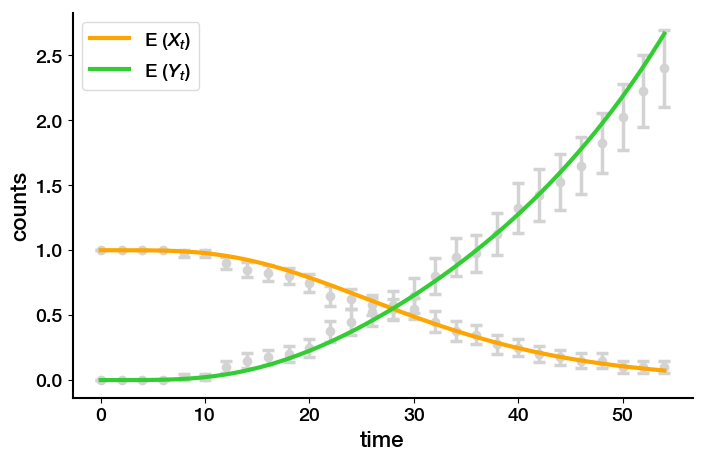

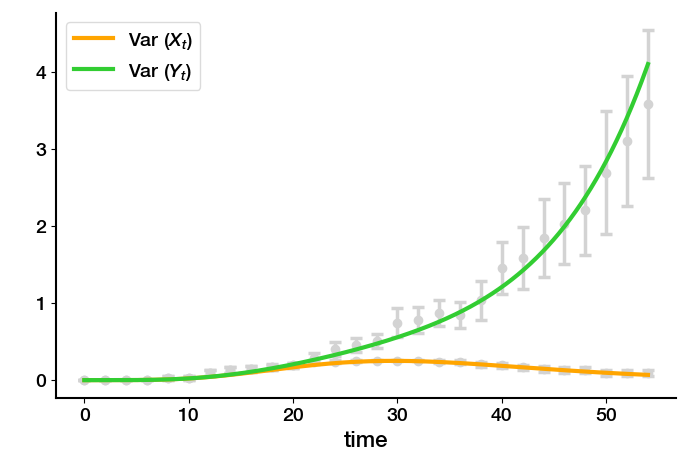

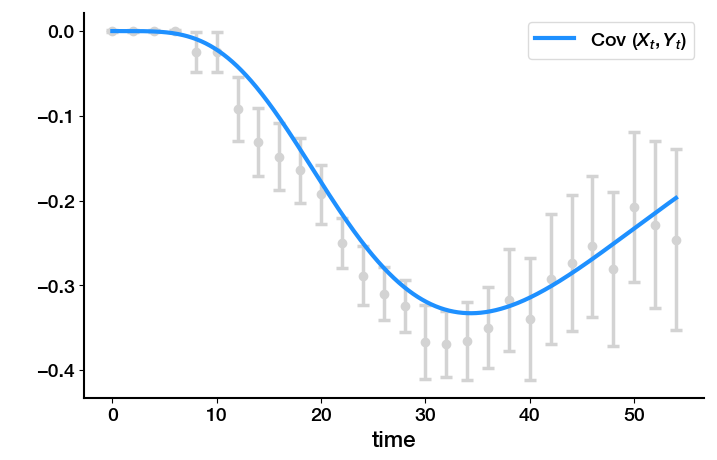

In [10]:
### model fits and model predictions, data optional in the background
### plotting best-fits model (without data and band)
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_covariance(settings), output)

### plotting best-fits model with data (without band)
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_mean_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_mean_data(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_var_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_variance_data(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_cov_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_covariance_data(settings), output)

start
end


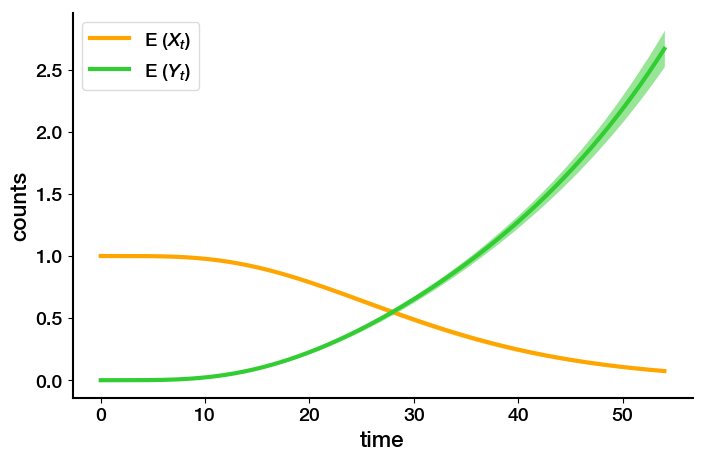

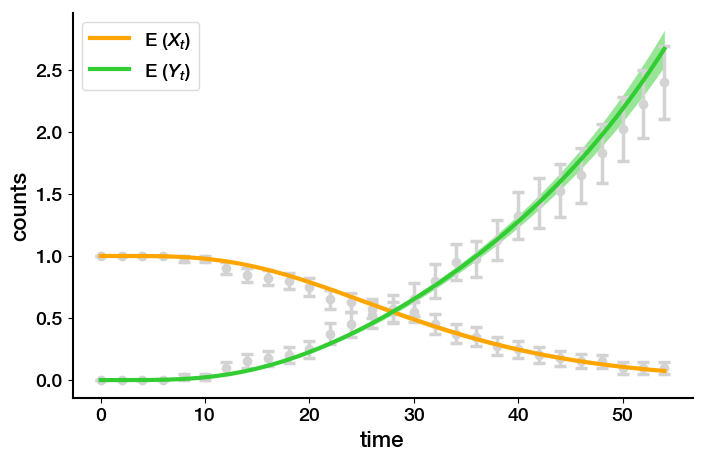

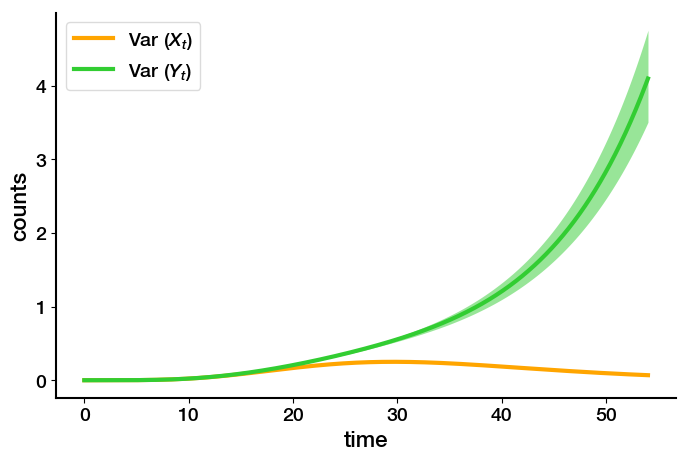

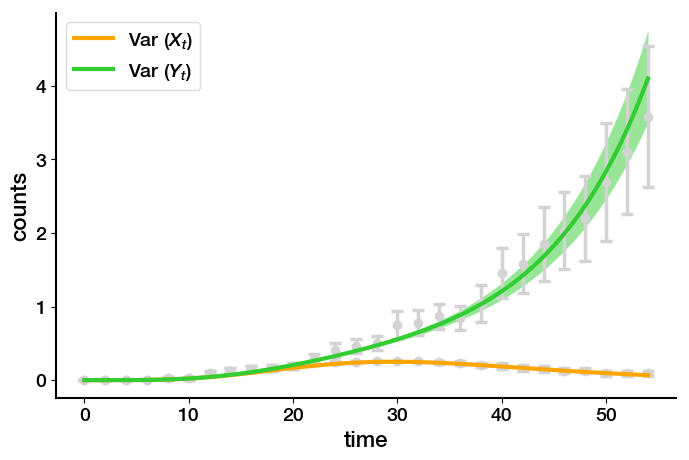

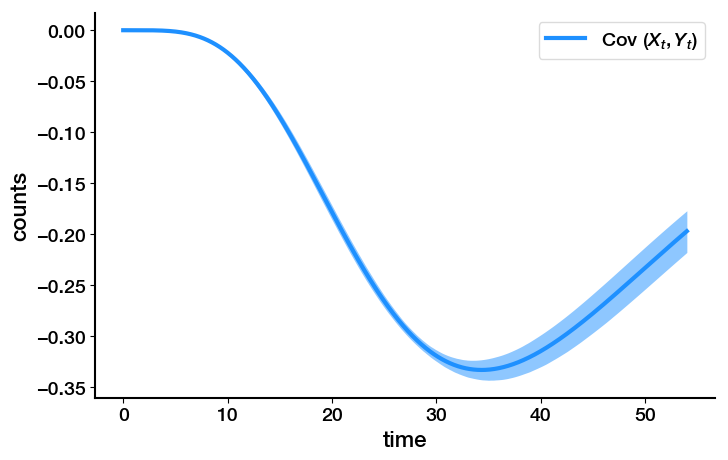

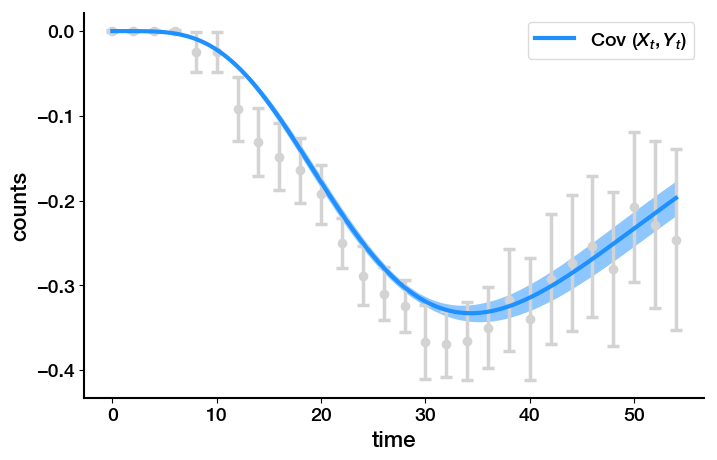

In [11]:
### best-fits model with confidence band plots
# mean without data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_w_band_evolv_mean_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.line_w_band_evolv(*est.line_w_band_evolv_mean_confidence(settings, num_sim_ensemble=10), output)

# mean with data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_and_line_w_band_evolv_mean_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_w_band_evolv(*est.dots_w_bars_and_line_w_band_evolv_mean_confidence(settings, num_sim_ensemble=10), output)

# var without data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_w_band_evolv_var_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.line_w_band_evolv(*est.line_w_band_evolv_variance_confidence(settings, num_sim_ensemble=10), output)

# var with data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}


settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_and_line_w_band_evolv_var_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_w_band_evolv(*est.dots_w_bars_and_line_w_band_evolv_variance_confidence(settings, num_sim_ensemble=10), output)

# cov without data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_w_band_evolv_cov_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.line_w_band_evolv(*est.line_w_band_evolv_covariance_confidence(settings, num_sim_ensemble=10), output)

# cov with data
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_and_line_w_band_evolv_cov_confidence'}
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_w_band_evolv(*est.dots_w_bars_and_line_w_band_evolv_covariance_confidence(settings, num_sim_ensemble=10), output)



#### C2 fit a selection of models to the *in silico* data

#### C3 fit a selection of models to the example data

In [2]:
### list of models, M_t = N_t + I_t ~ CD44-, A_t ~ CD44+
# full model
t_A7 = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'N_t', 'rate_symbol': 'd_an', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'N_t', 'rate_symbol': 'la_n', 'type': 'S -> S + S', 'reaction_steps': 7}
        ]

s_A7 = {'initial_values': {'N_t': 1.0, 'A_t': 0.0}, 'variables': {'M_t': ('N_t', ), 'A_t': ('A_t', )}, 'theta_bounds': {'d_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'd_an': (0.0, 0.5), 'la_n': (0.0, 0.5)}}

# full model, inactivation
t_A7i = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'N_t', 'rate_symbol': 'd_an', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'N_t', 'rate_symbol': 'la_n', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'I_t', 'rate_symbol': 'd_i', 'type': 'S -> E', 'reaction_steps': 1}
        ]

s_A7i = {'initial_values': {'N_t': 1.0, 'A_t': 0.0, 'I_t': 0.0}, 'variables': {'M_t': ('N_t', 'I_t'), 'A_t': ('A_t', )}, 'theta_bounds': {'d_i': (0.0, 0.5), 'd_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'd_an': (0.0, 0.5), 'la_n': (0.0, 0.5)}}

# naive division
t_B7 = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'N_t', 'rate_symbol': 'la_n', 'type': 'S -> S + S', 'reaction_steps': 7}
        ]
s_B7 = {'initial_values': {'N_t': 1.0, 'A_t': 0.0}, 'variables': {'M_t': ('N_t', ), 'A_t': ('A_t', )}, 'theta_bounds': {'d_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'la_n': (0.0, 0.5)}}

# naive division, inactivation
t_B7i = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'N_t', 'rate_symbol': 'la_n', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'I_t', 'rate_symbol': 'd_i', 'type': 'S -> E', 'reaction_steps': 1}
        ]
s_B7i = {'initial_values': {'N_t': 1.0, 'A_t': 0.0, 'I_t': 0.0}, 'variables': {'M_t': ('N_t', 'I_t'), 'A_t': ('A_t', )}, 'theta_bounds': {'d_i': (0.0, 0.5), 'd_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'la_n': (0.0, 0.5)}}

# minimal model 
t_C7 = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        ]
s_C7 = {'initial_values': {'N_t': 1.0, 'A_t': 0.0}, 'variables': {'M_t': ('N_t', ), 'A_t': ('A_t', )}, 'theta_bounds': {'d_na': (0.0, 0.5), 'la_a': (0.0, 0.5)}}

# minimal model, inactivation
t_C7i = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'I_t', 'rate_symbol': 'd_i', 'type': 'S -> E', 'reaction_steps': 1}
        ]
s_C7i = {'initial_values': {'N_t': 1.0, 'A_t': 0.0, 'I_t': 0.0}, 'variables': {'M_t': ('N_t', 'I_t'), 'A_t': ('A_t', )}, 'theta_bounds': {'d_i': (0.0, 0.5), 'd_na': (0.0, 0.5), 'la_a': (0.0, 0.5)}}

# backwards differentiation
t_D7 = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'N_t', 'rate_symbol': 'd_an', 'type': 'S -> E', 'reaction_steps': 7},
        ]
s_D7 = {'initial_values': {'N_t': 1.0, 'A_t': 0.0}, 'variables': {'M_t': ('N_t', ), 'A_t': ('A_t', )}, 'theta_bounds': {'d_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'd_an': (0.0, 0.5)}}

# backwards differentiation, inactivation
t_D7i = [
        {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 7},
        {'start': 'A_t', 'end': 'N_t', 'rate_symbol': 'd_an', 'type': 'S -> E', 'reaction_steps': 7},
        {'start': 'N_t', 'end': 'I_t', 'rate_symbol': 'd_i', 'type': 'S -> E', 'reaction_steps': 1}
        ]
s_D7i = {'initial_values': {'N_t': 1.0, 'A_t': 0.0, 'I_t': 0.0}, 'variables': {'M_t': ('N_t', 'I_t'), 'A_t': ('A_t', )}, 'theta_bounds': {'d_i': (0.0, 0.5), 'd_na': (0.0, 0.5), 'la_a': (0.0, 0.5), 'd_an': (0.0, 0.5)}}


model_list_cd44 = [
    [('net_A7'), (t_A7), (s_A7)],
    [('net_A7i'), (t_A7i), (s_A7i)],
    [('net_B7'), (t_B7), (s_B7)],
    [('net_B7i'), (t_B7i), (s_B7i)],
    [('net_C7'), (t_C7), (s_C7)],
    [('net_C7i'), (t_C7i), (s_C7i)],
    [('net_D7'), (t_D7), (s_D7)],
    [('net_D7i'), (t_D7i), (s_D7i)]
]

In [3]:
### load the cd44 data instance
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_summaryAtMtnotation.pickle', 'rb'))
print(data.data_name)

### input for selection
d = {
# model set
'model_set': model_list_cd44,

# data/model settings
'data': data,
'mean_only': False, # True or False

# mcmc settings
'burn_in_steps':                3, # 200, 500, 1000, 2000
'sampling_steps':               3, # 150, 500, 500
'num_temps':                    5, # 5
'num_walkers':                  64 # 64, 100, 200, 400
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)

### save model selection on cd44 data with pickle
with open('model_selection_cd44.pickle', 'wb') as file_:
    pickle.dump(res, file_)

count_data_cd44_manual_counting_18_01_14_summaryAtMtnotation
initialise estimation ...
initialise estimation ...
initialise estimation ...
initialise estimation ...
should only go here once (prepare_simulation_variables)
should only go here once (prepare_simulation_variables)
should only go here once (prepare_simulation_variables)
should only go here once (prepare_simulation_variables)
should go here just once (prepare_moment_simulation)
should go here just once (prepare_moment_simulation)
should go here just once (prepare_moment_simulation)
should go here just once (prepare_moment_simulation)
[[('V_0',), ('V_1',)], [('V_0', 'V_0'), ('V_0', 'V_1'), ('V_1', 'V_1')]]
{'V_0': ('A_t', ('A_t',)), 'V_1': ('M_t', ('N_t',))}
['A_t', 'M_t']
[('A_t', 'A_t'), ('M_t', 'M_t')]
[('A_t', 'M_t')]
run estimation ...
   burn in ...
[[('V_0',), ('V_1',)], [('V_0', 'V_0'), ('V_0', 'V_1'), ('V_1', 'V_1')]]
{'V_0': ('A_t', ('A_t',)), 'V_1': ('M_t', ('N_t', 'I_t'))}
['A_t', 'M_t']
[('A_t', 'A_t'), ('M_t', 'M

In [5]:
### load the cd44 data instance
res = pickle.load(open('model_selection_cd44.pickle', 'rb'))

print(res)

[<memo_py.estimation.Estimation object at 0x10aaec240>, <memo_py.estimation.Estimation object at 0x18125e1048>, <memo_py.estimation.Estimation object at 0x18125e1978>, <memo_py.estimation.Estimation object at 0x1812615208>, <memo_py.estimation.Estimation object at 0x181263a0f0>, <memo_py.estimation.Estimation object at 0x1812646b38>, <memo_py.estimation.Estimation object at 0x1812668668>, <memo_py.estimation.Estimation object at 0x181268a390>]
